## Mini Project 2  - Hadleigh Thompson. 
### ATSC 409 - Nov 2015

### Introduction
For this project we are required to introduce predators and prey to dasiy world, in the form of rabbits (that eat daisies) and Foxes (that prey on the rabbits).

We have already seen in lab 5 the coupling between temperature and daisy coverage - and we expect to see additional coupling with  daisies / rabbits and rabbits / foxes. The desired final state is a non-zero population for all three, with possible pedator/prey oscilations. 

Note: to run this notebook from here-on, required elements include:
    - miniproject2_hthompson.ipynb (this notebook)
    - miniproject.yaml (associted input values)
    - miniproject_functions.py (creation of the integrator class)
    - miniproject_integrator54.py (integrator instance using the input values from miniproject.yaml)
These can all be found in the miniproject2 folder

The runge kutta method used in lab 5 is our basis for our adatptive step size routine, where we use the 'timeloop5err( )' function. The adaptive tolerances will initially remain the same as adative.yaml where:
```yaml
adaptvars:
  dtpassmin: 0.1
  dtfailmax: 0.5
  dtfailmin: 0.1
  s: 0.9
  rtol: 1.0e-05
  atol: 1.0e-05
  maxsteps: 2000.0
  maxfail: 60.0
  dtpassmax: 5.0
```

### Initial Dasiy world equations
The fuctions used in lab 5 were based on equations:

$\frac{dA_w}{dt} = A_w ( \beta_w x - \chi)$ 

$\frac{dA_b}{dt} = A_b ( \beta_b x - \chi)$ 

$x = 1 - A_w - A_b$

$\beta_i = 1.0 - 0.003265(295.5 K -T_i)^2$

$T^4_i = R L \frac{S_0}{4\sigma}(\alpha_p-\alpha_i) + T^4_e$

$\alpha_p = A_w\alpha_w + A_b\alpha_b + A_g\alpha_g$

$T^4_e = L \frac{S_0}{4\sigma}(1-\alpha_p)$

Our aim now is to alter the first two equations where the fractional coverage of daisies will be modified by the amount of rabbits. 

So our daisy equations become:

$\frac{dA_w}{dt} = A_w (\beta_w x - \chi_w - \alpha A_R)$ 

$\frac{dA_b}{dt} = A_b (\beta_b x - \chi_b - \alpha A_R)$

Where $\alpha$ is the fraction daisies that the rabbits eat, out of all the white and black daisies avaliable. This is assuming the rabbits do not have a preference for a particular colour of daisy. 

Now need to create an equation for the rate of change of rabbits - which should include a birthrate proportional to the amount of daisies that the rabbits can find, and the likliehood of finding another rabbit. This is obviously tempered with a rabbit death rate and by the rabbits being hunted by foxes.

That is:

$\frac{dR}{dt} = A_R(\beta_R (1-x) - \chi_R - \epsilon A_F)$

The $(1-x)$ represents fractional coverage of all dasies since $x$ is defined as the fraction of bare ground $x = (1-A_w-A_b)$. We assume that the birthrate is dependent on this value since without a food supply, we should a decline in rabbit population. $\epsilon \  A_F$ represents the variable predation of rabbits ($\epsilon$) by a population of foxes ($A_F$).


In the absence of any larger predators, the rate of change of foxes will be proptional to the likelihood of a fox meeting another fox, and of food supply (once again, a lack of food supply we assume to effect a decline in birthrate) - and of a deathrate constant.

$\frac{dF}{dt} = A_F(\beta_R(A_R) - \chi_F)$

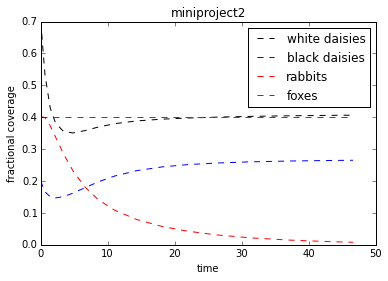

In [48]:
import miniproject2.miniproject_functions
from miniproject2.miniproject_functions import Integrator
from importlib import reload
reload(miniproject2.miniproject_integrator54)
from miniproject2.miniproject_integrator54 import miniproject_integ54

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

theSolver=miniproject_integ54('miniproject.yaml')
timeVals,yVals,errorList=theSolver.timeloop5Err()

yvals=pd.DataFrame.from_records(yVals,columns=['white','black','rabbits','foxes'])

thefig,theAx=plt.subplots(1,1)

points,=theAx.plot(timeVals,yvals['white'],'--k',label='white daisies')
points.set_markersize(12)
theLine1,=theAx.plot(timeVals,yvals['black'],'--b',label='black daisies')
theLine2,=theAx.plot(timeVals,yvals['rabbits'], '--r',label='rabbits')
theLine3,=theAx.plot(timeVals,yvals['foxes'], '--g',label='foxes')
theAx.set_title('miniproject2')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out=theAx.legend(loc='best')

# timeVals,yVals,errorList=theSolver.timeloop5fixed()
# whiteDaisies=[frac[0] for frac in yVals]